In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import  LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_excel('D:/MY DATA SHARING/PERSONAL DATA PROJECT/REFDATA SET/OWN DATA SET FOR WORK/advertising.xlsx')

In [4]:
df.head()

,Date,TV,Radio,Newspaper,Sales
0,2015-01-01,230.1,37.8,69.2,22.1
1,2015-01-08,44.5,39.3,45.1,10.4
2,2015-01-15,17.2,45.9,69.3,9.3
3,2015-01-22,151.5,41.3,58.5,18.5
4,2015-01-29,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       200 non-null    datetime64[ns]
 1   TV         200 non-null    float64       
 2   Radio      200 non-null    float64       
 3   Newspaper  200 non-null    float64       
 4   Sales      200 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.9 KB


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


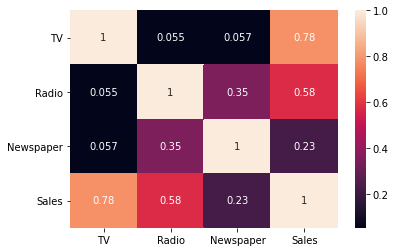

In [7]:
sns.heatmap(df.corr(),annot=True);

In [8]:
X = df.drop(['Sales','Date'],axis=1)
y=df['Sales']
features = X.columns

In [9]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [10]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [11]:
s = StandardScaler()
X = s.fit_transform(X)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [13]:
models_evalute = pd.DataFrame(index=['Null','KNN','MLR'],columns=['RMSE'])

In [14]:
ypred_null = y_train.mean()

# Using K-Neighbours Regressor

In [15]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [16]:
y_pred = knn.predict(X_test)

# Using Random Forest Calassification

In [17]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)
y_pred2= rf.predict(X_test)

# Using Linear Regression

In [18]:
lin = LinearRegression()
lin = lin.fit(X_train,y_train)
y_pred3 = lin.predict(X_test)

In [38]:
r_sq = lin.score(X, y)
>>> print('coefficient of determination:', r_sq)

coefficient of determination: 0.8965554844502457


In [39]:
print('intercept:',lin.intercept_)
print('slope:', lin.coef_)

intercept: 14.104964666139646
slope: [ 3.93370548  2.79106317 -0.1266221 ]


In [19]:
model_eval=pd.DataFrame(index=['KNN','MLR'],columns=['RMSE'])
model_eval.loc['KNN','RMSE']=np.sqrt(mean_squared_error(y_test,y_pred))
model_eval.loc['RF','RMSE'] = np.sqrt(mean_squared_error(y_test,y_pred2))
model_eval.loc['MLR','RMSE'] = np.sqrt(mean_squared_error(y_test,y_pred3))
model_eval.loc['NULL','RMSE'] = ypred_null
model_eval

,RMSE
KNN,1.68998
MLR,2.07813
RF,0.836015
NULL,13.940667


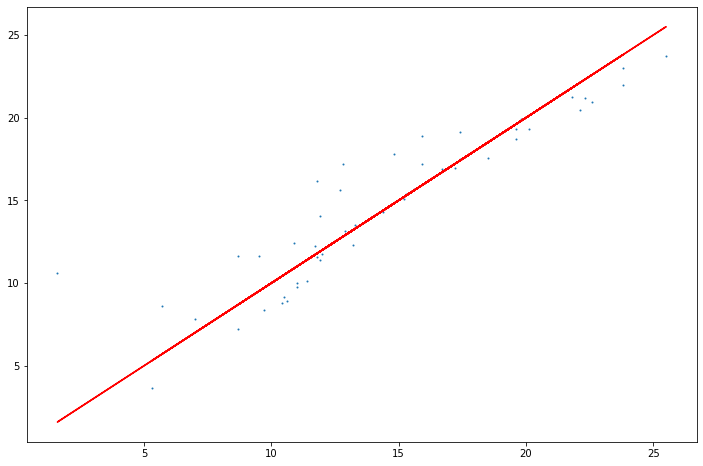

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(y_test,y_pred3,s=1)
ax.plot(y_test,y_test,color='red')

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

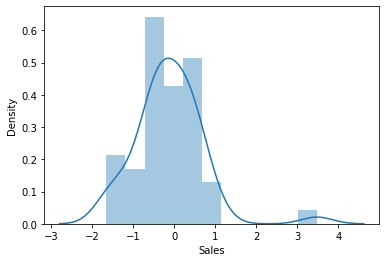

In [21]:
sns.distplot(y_pred2-y_test)

In [22]:
lin=LinearRegression()
lin.fit(X_train,y_train)
y_pred2 = lin.predict(X_test)
model_eval.loc['MLR','RMSE']=np.sqrt(mean_squared_error(y_pred2,y_test))

In [24]:
df

,Date,TV,Radio,Newspaper,Sales
0,2015-01-01,230.1,37.8,69.2,22.1
1,2015-01-08,44.5,39.3,45.1,10.4
2,2015-01-15,17.2,45.9,69.3,9.3
3,2015-01-22,151.5,41.3,58.5,18.5
4,2015-01-29,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,2018-09-27,38.2,3.7,13.8,7.6
196,2018-10-04,94.2,4.9,8.1,9.7
197,2018-10-11,177.0,9.3,6.4,12.8
198,2018-10-18,283.6,42.0,66.2,25.5


In [28]:
df.insert(loc=7, column='sales_Prediction_lr', value=lin.predict(X))


In [29]:
df

,Date,TV,Radio,Newspaper,Sales,sales_Prediction_knn,sales_Prediction_rf,sales_Prediction_lr
0,2015-01-01,230.1,37.8,69.2,22.1,22.10,21.491,20.434315
1,2015-01-08,44.5,39.3,45.1,10.4,10.46,10.560,12.332241
2,2015-01-15,17.2,45.9,69.3,9.3,10.41,8.575,12.181058
3,2015-01-22,151.5,41.3,58.5,18.5,19.60,18.812,17.545936
4,2015-01-29,180.8,10.8,58.4,12.9,14.03,13.595,13.144260
...,...,...,...,...,...,...,...,...
195,2018-09-27,38.2,3.7,13.8,7.6,8.22,7.794,5.516031
196,2018-10-04,94.2,4.9,8.1,9.7,10.03,9.609,8.347680
197,2018-10-11,177.0,9.3,6.4,12.8,12.17,12.796,12.990109
198,2018-10-18,283.6,42.0,66.2,25.5,23.14,24.978,23.700781


In [37]:
df.to_csv('sales_Predict.csv', index=False)